# 00_Base

In [1]:
import numpy as np
import random
import torch
torch.cuda.set_device(1)

In [2]:
random_seed = 617
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.cuda.manual_seed_all(random_seed) # if use multi-GPU
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)
random.seed(random_seed)
print("Random Seed:",random_seed)

Random Seed: 617


In [3]:
# Import utils from a specific defense
from defenses.base.loader import get_loader
from defenses.base.model import get_model
from defenses.base.train import Trainer, get_acc

Loader : Base
Model : Base
Train : Base


In [4]:
# Set Name
NAME = "00_Base"

## 1. Train

In [5]:
# Get Train, Test datasets
train_loader_ns, _ = get_loader(shuffle_train=False)
train_loader, test_loader = get_loader(shuffle_train=True)

# Get Model
model = get_model().cuda()

Files already downloaded and verified
Files already downloaded and verified
Data Loaded!
Train Data Length : 50000
Test Data Length : 10000
Files already downloaded and verified
Files already downloaded and verified
Data Loaded!
Train Data Length : 50000
Test Data Length : 10000
WRN-28 is loaded.


In [6]:
train_sets = iter(train_loader_ns).next()
test_sets = iter(test_loader).next()

In [7]:
# Train Model
trainer = Trainer(model, train_sets, test_sets)
trainer.train(train_loader, epochs=200,
              save_path="./_models/"+NAME,
              record_type="Epoch", save_type="Epoch")

Train Information:
-Epochs: 200
-Optimizer: SGD (
Parameter Group 0
    dampening: 0
    initial_lr: 0.1
    lr: 0.1
    momentum: 0.9
    nesterov: False
    weight_decay: 0.0005
)
-Scheduler: <torch.optim.lr_scheduler.MultiStepLR object at 0x7f78dcd36b70>
-Save Path: ./_models/00_Base
-Save Type: Per Epoch
-Record Type: Per Epoch
-Device: cuda
--------------------------------------------------------------------------------------------------------------------------
Epoch   Loss     Acc       Clean(Tr)   FGSM(Tr)   PGD(Tr)   GN(Tr)    Clean(Te)   FGSM(Te)   PGD(Te)   GN(Te)    lr       
1       1.6672   37.5962   55.4688     7.8125     1.5625    39.8438   55.4688     4.6875     1.5625    41.4062   0.1000   
--------------------------------------------------------------------------------------------------------------------------
2       1.1395   58.8101   53.9062     9.3750     0.0000    43.7500   53.9062     3.9062     0.0000    44.5312   0.1000   
-------------------------------------

32      0.3227   88.9483   84.3750     10.1562    0.0000    42.9688   80.4688     11.7188    0.0000    41.4062   0.1000   
--------------------------------------------------------------------------------------------------------------------------
33      0.3239   88.9784   93.7500     2.3438     0.0000    42.1875   85.9375     6.2500     0.0000    34.3750   0.1000   
--------------------------------------------------------------------------------------------------------------------------
34      0.3230   88.9583   87.5000     7.0312     0.0000    21.0938   81.2500     7.0312     0.0000    19.5312   0.1000   
--------------------------------------------------------------------------------------------------------------------------
35      0.3205   88.9623   83.5938     3.1250     0.0000    28.9062   78.9062     9.3750     0.0000    26.5625   0.1000   
--------------------------------------------------------------------------------------------------------------------------
36      0.3193  

66      0.0745   97.5120   100.0000    8.5938     0.0000    35.9375   94.5312     14.0625    0.0000    32.8125   0.0200   
--------------------------------------------------------------------------------------------------------------------------
67      0.0744   97.5100   99.2188     8.5938     0.0000    28.9062   94.5312     13.2812    0.0000    25.0000   0.0200   
--------------------------------------------------------------------------------------------------------------------------
68      0.0712   97.6342   99.2188     11.7188    0.0000    26.5625   96.0938     14.0625    0.0000    25.0000   0.0200   
--------------------------------------------------------------------------------------------------------------------------
69      0.0750   97.5160   99.2188     7.8125     0.0000    34.3750   94.5312     6.2500     0.0000    25.0000   0.0200   
--------------------------------------------------------------------------------------------------------------------------
70      0.0724  

100     0.0818   97.2596   99.2188     11.7188    0.0000    28.9062   92.9688     13.2812    0.0000    28.9062   0.0200   
--------------------------------------------------------------------------------------------------------------------------
101     0.0823   97.2696   98.4375     12.5000    0.0000    27.3438   95.3125     10.9375    0.0000    28.9062   0.0200   
--------------------------------------------------------------------------------------------------------------------------
102     0.0764   97.4539   99.2188     7.0312     0.0000    24.2188   93.7500     11.7188    0.0000    29.6875   0.0200   
--------------------------------------------------------------------------------------------------------------------------
103     0.0847   97.1094   100.0000    9.3750     0.0000    19.5312   89.8438     11.7188    0.0000    21.8750   0.0200   
--------------------------------------------------------------------------------------------------------------------------
104     0.0799  

134     0.0041   99.9399   100.0000    47.6562    0.0000    25.7812   96.0938     36.7188    0.0000    28.1250   0.0040   
--------------------------------------------------------------------------------------------------------------------------
135     0.0041   99.9339   100.0000    45.3125    0.0000    23.4375   96.0938     36.7188    0.0000    25.7812   0.0040   
--------------------------------------------------------------------------------------------------------------------------
136     0.0039   99.9379   100.0000    45.3125    0.0000    25.7812   94.5312     38.2812    0.0000    33.5938   0.0040   
--------------------------------------------------------------------------------------------------------------------------
137     0.0039   99.9399   100.0000    47.6562    0.0000    31.2500   96.0938     41.4062    0.0000    26.5625   0.0040   
--------------------------------------------------------------------------------------------------------------------------
138     0.0038  

168     0.0023   99.9900   100.0000    53.9062    0.0000    30.4688   96.0938     44.5312    0.0000    26.5625   0.0008   
--------------------------------------------------------------------------------------------------------------------------
169     0.0022   99.9880   100.0000    54.6875    0.0000    30.4688   96.0938     46.0938    0.7812    27.3438   0.0008   
--------------------------------------------------------------------------------------------------------------------------
170     0.0023   99.9840   100.0000    57.0312    0.0000    25.0000   95.3125     46.8750    0.7812    27.3438   0.0008   
--------------------------------------------------------------------------------------------------------------------------
171     0.0024   99.9800   100.0000    53.9062    0.0000    27.3438   95.3125     44.5312    0.7812    28.1250   0.0008   
--------------------------------------------------------------------------------------------------------------------------
172     0.0021  

In [8]:
trainer.save_all("./_models/"+NAME)

...Saved as csv to ./_models/00_Base.csv !


In [9]:
print("Final Test Acc : %2.2f"%get_acc(model, test_loader))

Final Test Acc : 96.26


## 2. Record Visualization

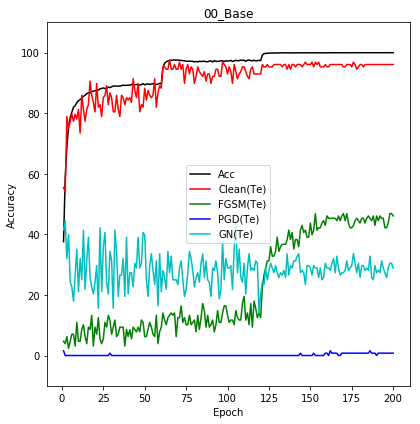

In [11]:
# Plot Train and Test Accuracy
trainer.rm.plot(title=NAME, xlabel="Epoch", ylabel="Accuracy", ylabel_second="Loss",
                x_key='Epoch', y_keys=['Acc', 'Clean(Te)', 'FGSM(Te)', 'PGD(Te)', 'GN(Te)'],
                ylim=(-10, 110), colors=['k', 'r', 'g', 'b', 'c'])

## 3. White Box Attack

In [12]:
import torchattacks
from torchattacks import FGSM, PGD, MultiAttack

In [13]:
model.load_state_dict(torch.load("./_models/"+NAME+".pth"))
model = model.cuda().eval()

### 3.1 FGSM

In [14]:
fgsm = FGSM(model, eps=8/255)
fgsm.set_mode('int')
fgsm.save(data_loader=test_loader,
          file_name="./_datasets/"+NAME+"_FGSM.pt", accuracy=True)

- Save Progress : 100.00 % / Accuracy : 47.34 %
- Save Complete!


### 3.2 PGD

In [15]:
# WB2 : PGD
pgd = PGD(model, alpha=2/255, eps=8/255, steps=50)
pgd.set_mode('int')
pgd.save(data_loader=test_loader,
         file_name="./_datasets/"+NAME+"_PGD.pt", accuracy=True)

- Save Progress : 100.00 % / Accuracy : 0.00 %
- Save Complete!


### 3.3 PGD with 10 Random Restarts

In [16]:
# WB3 : PGD
pgd = PGD(model, alpha=2/255, eps=8/255, steps=50, random_start=True)
multi = MultiAttack(model, [pgd]*10)
multi.set_mode('int')
multi.save(data_loader=test_loader,
           file_name="./_datasets/"+NAME+"_RPGD.pt", accuracy=True)

/usr/local/lib/python3.6/dist-packages/torchattacks/attacks/multiattack.py:58: Warning:


 * Ealry Stopped cause all images are successfully perturbed.



- Save Progress : 100.00 % / Accuracy : 0.00 %
- Save Complete!


## 4. Black Box Attack

In [17]:
from torch.utils.data import TensorDataset, DataLoader

In [18]:
# BB1 : WRN_28_20
adv_images, adv_labels = torch.load("./_datasets/00_WRN_28_20_PGD.pt")
adv_data = TensorDataset(adv_images.float()/255, adv_labels)
adv_loader = DataLoader(adv_data, batch_size=128, shuffle=False)
get_acc(model, adv_loader)

2.67

In [19]:
# BB2 : WRN_40_10
adv_images, adv_labels = torch.load("./_datasets/00_WRN_40_10_PGD.pt")
adv_data = torch.utils.data.TensorDataset(adv_images.float()/255, adv_labels)
adv_loader = DataLoader(adv_data, batch_size=128, shuffle=False)
get_acc(model, adv_loader)

5.79